In [2]:
#!pip install mercury
#!pip install oracledb
#!pip install matplotlib
#!pip install ipywidgets matplotlib
#!pip install ipympl


In [3]:
#%matplotlib notebook 
%matplotlib widget
#make the plots interactive

# Welcome to DriveSafeUSA 
Driving is an integral part of our daily lives, but it comes with risks. Every year, countless lives are affected by driving accidents, making it crucial to prioritize safety on the roads. Introducing DriveSafeUSA - an innovative application designed to enhance your driving experience and keep you informed about potential hazards on the road.


### What is DriveSafeUSA
DriveSafeUSA is a web-based application meticulously crafted to analyze years of driving data with the aim of empowering users with knowledge about potential driving hazards. Our platform is dedicated to promoting safer driving habits and ultimately reducing the number of accidents on American roads.

### How to Use DriveSafeUSA
DriveSafeUSA is designed to be both simple to use and powerful in its capabilities. With an intuitive user interface, navigating through the application is effortless, yet the insights it provides are profound. Here's how you can harness the full potential of DriveSafeUSA:

#### 1. Explore Temporal Analysis: 
Delve into the depths of driving data with our Temporal Analysis feature. This powerful tool allows users to analyze trends over time, providing invaluable insights into the evolution of driving risks during specific periods. By selecting a range of time periods, users can visualize the changing landscape of driving hazards through chronological graphs and trend charts. 
#### 2. Stay Informed, Stay Safe:
DriveSafeUSA will help you to access insightful analytics, and gain a deeper understanding of driving patterns and trends. By staying informed, you can proactively adjust your driving behavior and contribute to a safer driving environment for yourself and others.


## Join Us in Making America's Roads Safer
At DriveSafeUSA, our mission is to make America's roads safer for everyone. By utilizing our platform, you're not just accessing valuable information - you're actively contributing to a safer driving environment for yourself and others.


In [4]:
import mercury as mr # for widgets
import oracledb
import random # for random data generation
from matplotlib import pyplot as plt # for chart
import time
import numpy as np
from ipywidgets import interactive

In [5]:
from pythonSqlQuery import *
from plotData import *

In [6]:
#data =execute_sql_script("../sqlScripts/selectAccidentData.sql")
#labels=["Severity", "Distance (mi)"]


In [7]:
#data

In [7]:
#plot(data,labels,"Base graph")

In [8]:
raw_data=execute_sql_script("../sqlScripts/Query1_WindDirection.sql") 

Successfully executed script: ../sqlScripts/Query1_WindDirection.sql


## Investigating the Impact of Wind Directions on Road Safety
Exploring the relationship between wind direction and accident severity is essential for identifying specific risk factors associated with adverse weather conditions, developing targeted safety measures, and enhancing driver awareness. By understanding how wind direction influences accident severity, transportation authorities can implement optimized resource allocation, policies, and safety campaigns to mitigate risks and improve road safety. This knowledge enables informed decision-making processes aimed at reducing the frequency and severity of accidents caused by adverse wind conditions, ultimately enhancing safety for all road users.

In [9]:
raw_data[0]
#dates = [np.datetime64(f"{year}-{month:02d}") for year, month, *_ in raw_data[0]]
#dates

[(2016, 1, 4, 5, 0.06, 'towards the vehicle'),
 (2016, 2, 2.7559055118110236, 127, 1.462992125984252, 'against the vehicle'),
 (2016, 2, 2.6145833333333335, 192, 2.146875, 'perpendicular to the vehicle'),
 (2016, 3, 2.4635761589403975, 453, 1.11560706401766, 'against the vehicle'),
 (2016, 3, 2.4291666666666667, 960, 0.78425, 'perpendicular to the vehicle'),
 (2016, 4, 2.337198929527208, 1121, 0.7562176628010705, 'against the vehicle'),
 (2016,
  4,
  2.374212515749685,
  2381,
  0.6906299874002519,
  'perpendicular to the vehicle'),
 (2016, 4, 2, 1, 0.54, 'towards the vehicle'),
 (2016,
  5,
  2.2869440459110475,
  1394,
  0.6472596843615495,
  'against the vehicle'),
 (2016,
  5,
  2.2981118373275238,
  2754,
  0.696045751633987,
  'perpendicular to the vehicle'),
 (2016, 5, 2, 1, 0.39, 'towards the vehicle'),
 (2016, 6, 2.414660831509847, 1828, 0.8717341356673961, 'against the vehicle'),
 (2016,
  6,
  2.3877019280875458,
  3838,
  0.7411438249088067,
  'perpendicular to the vehicle

In [10]:
towards_data = [row[:-1] for row in raw_data[0] if row[5][0]=="t"] # Used to grab all of the values that are towards the vehicle
towards_data

[(2016, 1, 4, 5, 0.06),
 (2016, 4, 2, 1, 0.54),
 (2016, 5, 2, 1, 0.39),
 (2016, 6, 2, 2, 0.77),
 (2016, 7, 4, 1, 0.32),
 (2016, 8, 2, 1, 0.12),
 (2016, 9, 2, 2, 0.305),
 (2016, 10, 3.2, 5, 1.118),
 (2016, 11, 2.6, 5, 0.756),
 (2016, 12, 2.75, 4, 0.4575),
 (2017, 1, 3, 4, 3.105),
 (2017, 2, 2, 2, 1.55),
 (2017, 3, 2, 2, 2.285),
 (2017, 4, 2.5, 2, 0.84),
 (2017, 5, 2, 1, 0.49),
 (2017, 6, 2, 1, 0.53),
 (2018, 8, 2, 1, 0.04),
 (2018, 9, 4, 2, 0.925),
 (2018, 10, 3, 4, 1.41),
 (2018, 11, 2, 4, 0.605),
 (2018, 12, 2.2, 10, 0.902),
 (2019, 1, 2.125, 8, 0.74)]

In [11]:
against_data = [row[:-1] for row in raw_data[0] if row[5][0]=="a"] # Used to grab all of the values against the vehicle
perpendicular_data = [row[:-1] for row in raw_data[0] if row[5][0]=="p"] # Used to grab all of the values perpendicular to the vehicle
#labels=["Towards the Data"]

In [15]:
against_data

[(2016, 2, 2.7559055118110236, 127, 1.462992125984252),
 (2016, 3, 2.4635761589403975, 453, 1.11560706401766),
 (2016, 4, 2.337198929527208, 1121, 0.7562176628010705),
 (2016, 5, 2.2869440459110475, 1394, 0.6472596843615495),
 (2016, 6, 2.414660831509847, 1828, 0.8717341356673961),
 (2016, 7, 2.412720848056537, 2830, 0.8253074204946996),
 (2016, 8, 2.4218101300858015, 3613, 0.7230750069194575),
 (2016, 9, 2.3964536634325864, 2989, 0.6943860823017731),
 (2016, 10, 2.3566739606126914, 3656, 0.6594283369803063),
 (2016, 11, 2.3969010727056017, 3356, 0.6760965435041716),
 (2016, 12, 2.4095860566448803, 3672, 0.7731726579520697),
 (2017, 1, 2.4210843373493978, 3320, 0.7316415662650603),
 (2017, 2, 2.390671420083185, 3366, 0.6568627450980392),
 (2017, 3, 2.4239532019704435, 3248, 0.8111052955665025),
 (2017, 4, 2.4769452449567724, 2776, 0.7911455331412104),
 (2017, 5, 2.5035199463627222, 2983, 0.7572779081461616),
 (2017, 6, 2.5066273932253313, 2716, 0.9075920471281296),
 (2017, 7, 2.4892778

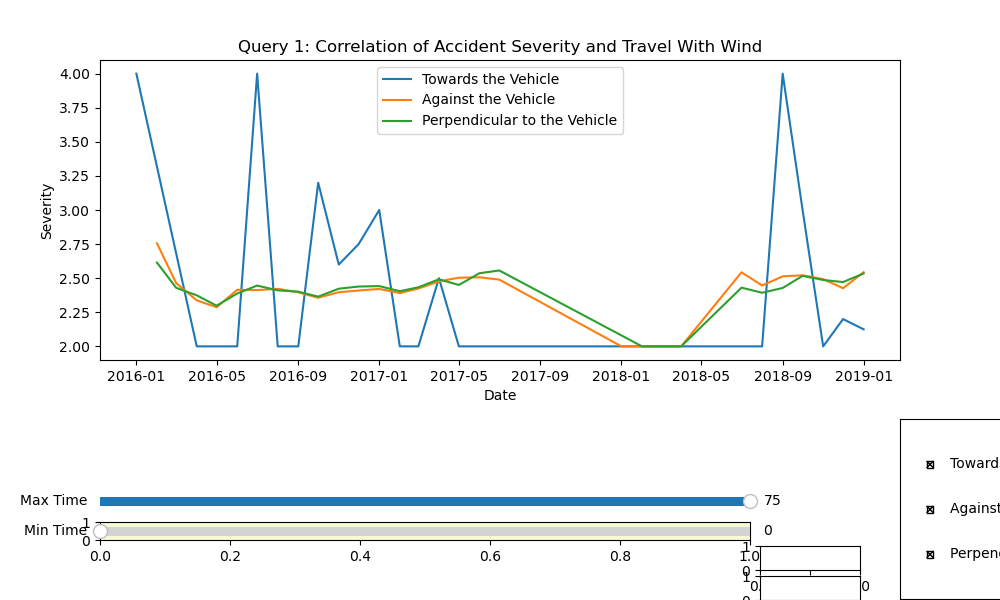

In [16]:
labels=["Towards the Vehicle", "Against the Vehicle", "Perpendicular to the Vehicle"]
Query1SeverityPlot(raw_data, labels,"Query 1: Correlation of Accident Severity and Travel With Wind")

The graph visualizes the relationship between accident severity and travel direction relative to the wind, providing users with valuable insights into how wind conditions impact road safety. Users have the ability to select a specific time period of interest by dragging the range along the x-axis, allowing for targeted analysis of temporal trends. Within the graph, three distinct lines are displayed, each representing a different wind direction: towards the vehicle, against the vehicle, and perpendicular to the vehicle. This segmentation enables users to compare and contrast the effects of various wind directions on accident severity.

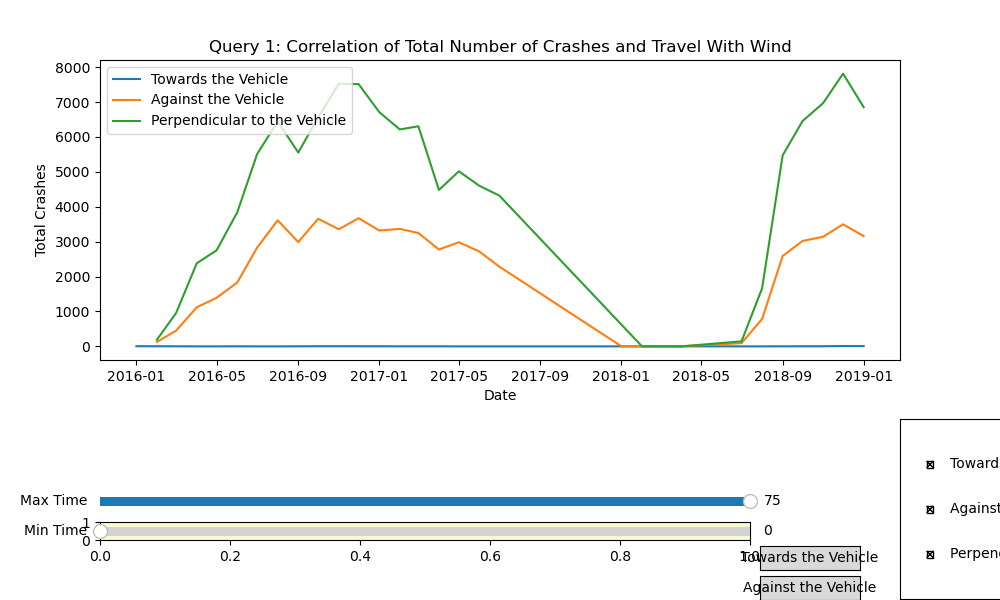

In [17]:
labels=["Towards the Vehicle", "Against the Vehicle", "Perpendicular to the Vehicle"]
Query1CrashesPlot(raw_data, labels,"Query 1: Correlation of Total Number of Crashes and Travel With Wind")

The graph provides a comprehensive overview of the correlation between the total number of crashes and travel direction relative to the wind, offering valuable insights into the impact of wind conditions on road safety. With the x-axis consistently representing the time period, users can easily select and analyze specific time intervals by dragging the range along the axis, facilitating targeted exploration of temporal trends. Within the graph, users are presented with three distinct lines, each representing a different wind direction: towards the vehicle, against the vehicle, and perpendicular to the vehicle. This segmentation allows users to compare and contrast how the total number of crashes varies based on the direction of travel in relation to the wind.

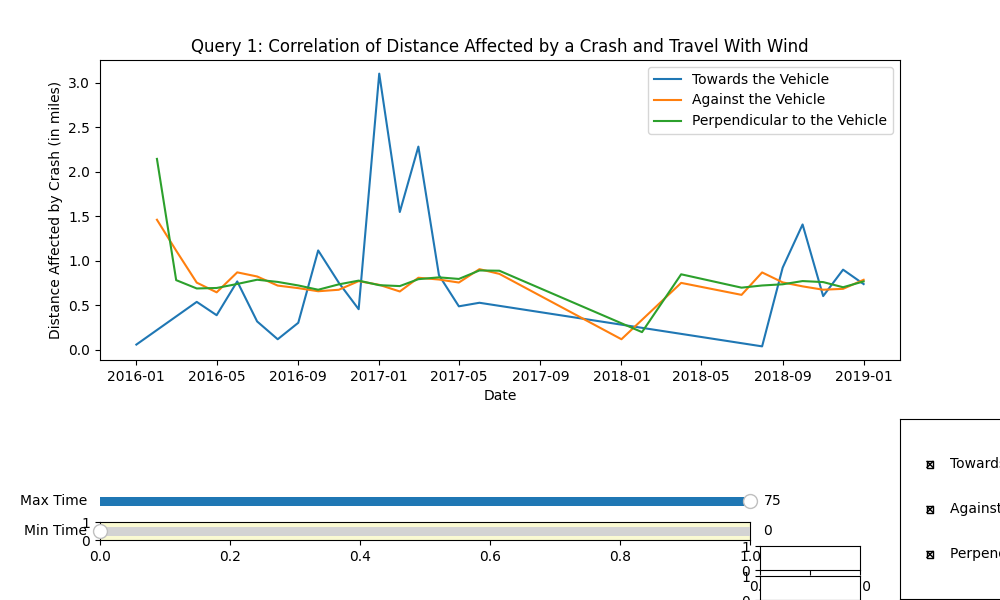

In [15]:
labels=["Towards the Vehicle", "Against the Vehicle", "Perpendicular to the Vehicle"]
Query1DistancePlot(raw_data, labels,"Query 1: Correlation of Distance Affected by a Crash and Travel With Wind")

The graph depicting the correlation of distance affected by a crash with travel direction relative to the wind offers a comprehensive understanding of how wind conditions influence accident severity over time. Users are presented with three distinct lines representing different wind directions: towards the vehicle, against the vehicle, and perpendicular to the vehicle. By selecting specific time periods, users can scrutinize the impact of wind direction on the extent of damage caused by crashes. This level of granularity empowers users to discern fluctuations in accident severity based on the direction of travel in relation to the wind, providing invaluable insights for implementing targeted safety measures and devising strategies to enhance vehicle control and visibility during adverse weather conditions.